<a href="https://colab.research.google.com/github/wdwzyyg/Atom-Finder/blob/main/ResultPlot_WS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import ndimage as ndi
from scipy import optimize
from skimage.feature import peak_local_max
from skimage.morphology import local_maxima
from pylab import *
from PIL import Image
import glob
import os 
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import numpy as np
import plotly.express as px
import matplotlib.gridspec as gridspec
import mpl_toolkits.axisartist as axisartist

from sklearn.metrics import r2_score
import pylab as pl

from scipy.interpolate import pchip_interpolate

# Radar chart

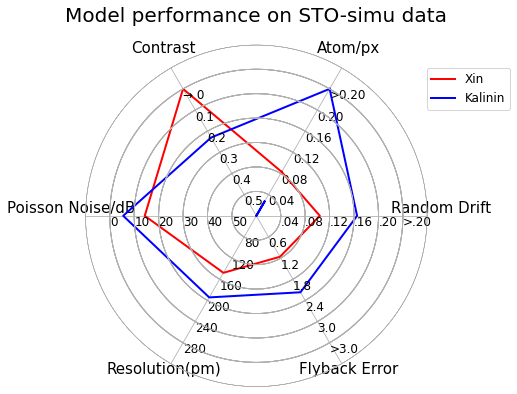

In [ ]:
# Sergei's and xin's on 'ID-Recall > 90% ID-Precision > 95% RMSE < 0.30A' 

# Cutoff values
# xin = 8.3, null, 14.325, 147.8, 1.162, 0.104
# sergei = null, 0.23, 5.502, 194.3, 2.169, 0.165

fig = pl.figure(figsize=(5, 5))
titles = ["Atom/px", "Contrast", "Poisson Noise/dB", "Resolution(pm)","Flyback Error","Random Drift"]

labels = [
    ["0.04", "0.08","0.12","0.16", "0.20", "\u003E0.20"], 
    ["0.5","0.4","0.3", "0.2", "0.1", "\u2192 0"], 
    ["50","40","30","20", "10","0"], 
    ["80", "120", "160","200", "240","280"],
    ["0.6","1.2","1.8", "2.4","3.0","\u003E3.0"],
    [".04",".08",".12",".16", ".20","\u003E.20"]
]

radar = Radar(fig, titles, labels)
radar.plot([8.3/100/0.04, 
            6, 
            6-14.325/10,
            (147.8-80)/40+1, 
            1.162/0.6, 
            0.104/0.04],  "-", lw=2, color="r", label = 'Xin')
radar.plot([6, 
            6-0.23/0.1, 
            6-5.502/10, 
            (194.3-80)/40+1, 
            2.169/0.6, 
            0.165/0.04],  "-", lw=2, color="b")

radar.plot([2.7/100/0.04, 
            0, 
            0, 
            0, 
            0, 
            0],  "-", lw=2, color="b", label = 'Kalinin')
radar.ax.legend(fontsize = 12,loc='upper right', bbox_to_anchor=(1.26, 0.95))


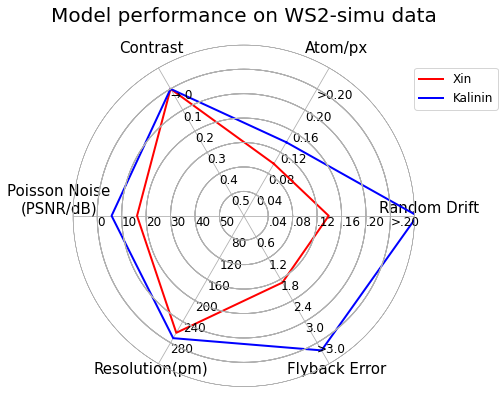

In [ ]:
# Sergei's and xin's on 'ID-Recall > 90% ID-Precision > 95% RMSE < 0.30A' 

# Cutoff values
# xin = 9.832, null, 16.284, 261.185, 1.894, 0.139
# sergei = 13.906, null, 5.866, 271.36, 3.817, 0.284

fig = pl.figure(figsize=(5, 5))
titles = ["Atom/px", "Contrast", "Poisson Noise\n(PSNR/dB)", "Resolution(pm)","Flyback Error","Random Drift"]

labels = [
    ["0.04", "0.08","0.12","0.16", "0.20", "\u003E0.20"], 
    ["0.5","0.4","0.3", "0.2", "0.1", "\u2192 0"], 
    ["50","40","30","20", "10","0"], 
    ["80", "120", "160","200", "240","280"],
    ["0.6","1.2","1.8", "2.4","3.0","\u003E3.0"],
    [".04",".08",".12",".16", ".20","\u003E.20"]
]

radar = Radar(fig, titles, labels)
radar.plot([9.832/100/0.04, 
            6, 
            6-16.284/10,
            (261.185-80)/40+1, 
            1.894/0.6, 
            0.139/0.04],  "-", lw=2, color="r", label = 'Xin')
radar.plot([13.906/100/0.04, 
            6, 
            6-5.866/10, 
            (271.36-80)/40+1, 
            3.817/0.6, 
            0.284/0.04],  "-", lw=2, color="b", label = 'Kalinin')

radar.ax.legend(fontsize = 12,loc='upper right', bbox_to_anchor=(1.26, 0.95))


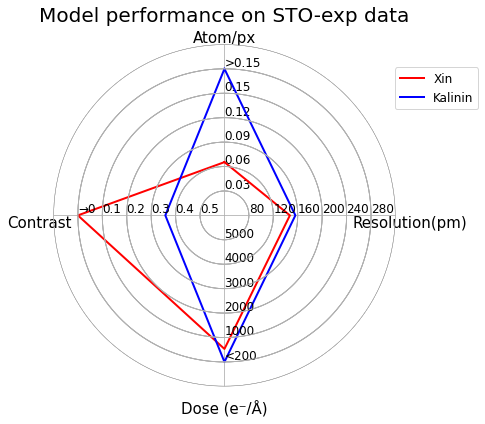

In [ ]:
# Sergei's and xin's on 'ID-Recall > 90%\nID-Precision > 95%\nRMSE < 0.30\u00c5' !exp!

# xin = 6.539, Null, 532.67, 147.14
# sergei = Null, 0.358, Null, 156.13

fig = pl.figure(figsize=(5, 5))
titles = ["Atom/px", "Contrast", "Dose (e\u207B/\u212B)", "Resolution(pm)"]

labels = [
    ["0.03", "0.06","0.09","0.12", "0.15", "\u003E0.15"], 
    ["0.5","0.4","0.3", "0.2", "0.1", "\u21920"], 
    ["5000","4000","3000","2000", "1000","\u003C200"], 
    ["80", "120", "160","200", "240","280"]
]

radar = Radar(fig, titles, labels)
radar.plot([6.539/100/0.03, 6, 6-532.67/1000, (147.14-80)/40+1],  "-", lw=2, color="r", label = 'Xin')
radar.plot([6, 6-0.358/0.1, 6, (156.13-80)/40+1],  "-", lw=2, color="b", label = 'Kalinin')

radar.ax.legend(fontsize = 12,loc='upper right', bbox_to_anchor=(1.26, 0.95))


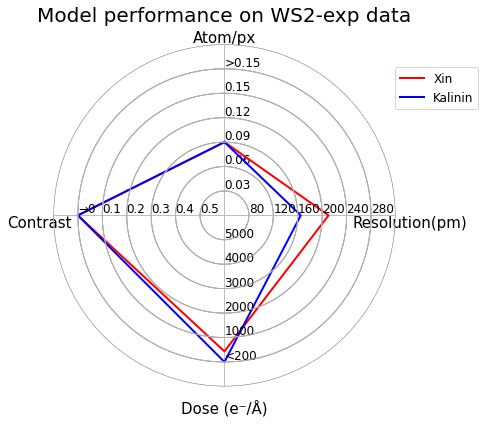

In [ ]:
# Sergei's and xin's on 'ID-Recall > 90%\nID-Precision > 95%\nRMSE < 0.30\u00c5' !exp!

# xin = 6.539, Null, 532.67, 147.14
# sergei = Null, 0.358, Null, 156.13

fig = pl.figure(figsize=(5, 5))
titles = ["Atom/px", "Contrast", "Dose (e\u207B/\u212B)", "Resolution(pm)"]

labels = [
    ["0.03", "0.06","0.09","0.12", "0.15", "\u003E0.15"], 
    ["0.5","0.4","0.3", "0.2", "0.1", "\u21920"], 
    ["5000","4000","3000","2000", "1000","\u003C200"], 
    ["80", "120", "160","200", "240","280"]
]

radar = Radar(fig, titles, labels)
radar.plot([3, 6, 6-432.67/1000, (187.86-60)/30],  "-", lw=2, color="r", label = 'Xin')
radar.plot([3, 6, 6, (153.73-60)/30],  "-", lw=2, color="b", label = 'Kalinin')

radar.ax.legend(fontsize = 12,loc='upper right', bbox_to_anchor=(1.26, 0.95))


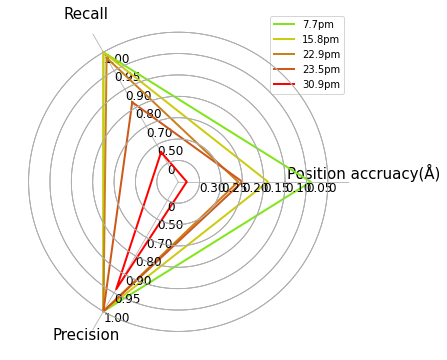

In [ ]:
#Fig 08/20/2020
fig = pl.figure(figsize=(5, 5))
titles = ["Recall", "Precision", "Position accruacy(\u00c5)"]

labels = [
    ["0", "0.50", "0.70","0.80","0.90","0.95", "1.00"], 
    ["0", "0.50", "0.70","0.80","0.90","0.95", "1.00"], 
    ["0.30","0.25","0.20","0.15","0.10","0.05","0"]
]

radar = Radar(fig, titles, labels)
radar.plot([7, 7, 6.2],  "-", lw=2, color = (0.5, 0.9, 0.1), label="7.7pm")
radar.plot([7, 7, 4.2],  "-", lw=2, color = (0.8, 0.8, 0.06), label="15.8pm")
radar.plot([6.7, 7, 2.8],  "-", lw=2, color = (0.8, 0.5, 0.1), label="22.9pm")
radar.plot([4.3, 7, 3],  "-", lw=2, color = (0.8, 0.35, 0.1), label="23.5pm")
radar.plot([1.6, 5.8, 0.4],  "-", lw=2,color = (1, 0, 0), label="30.9pm")
radar.ax.legend()


# Aux function

In [ ]:
class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            #rect = [-0.05, -0.05, 1.05, 1.05]
            rect = [0.05, 0.05, 0.95, 0.95]
        self.n = len(titles)
        #########################
        startangle = 90
        self.angles = np.arange(startangle, startangle+360, 360.0/self.n)
        #########################
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, va ='top', wrap = 0, fontsize = 15)
        self.ax.set
        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 8), angle=angle, labels=label,fontsize = 12,va = 'bottom')
            ax.spines["polar"].set_visible(False)
            ############
            ax.set_ylim(0, 7)
            ############
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        self.ax.set_title('Model performance on WS2-exp data', fontsize=20, )

In [ ]:
!pip install pynverse
from pynverse import inversefunc
from scipy.optimize import curve_fit
def poly3(x, a, b, c, d):
  return a*x**3+b*x**2+c*x+d
def ssqrt(x, a, b,c): 
  return np.sqrt(a+b*x)+c
def expt(x,a,b,c):
  return  a * exp(-x/b)+c
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)
def logf(x,a,b,c):
  return  a * log(-x/b)+c

def visualscore_nonlinear(obj,paramlist,scorelist,xylabelnames,scorelimit,ylim):
  '''
  Available functions: ssqrt, expt, sigmoid
  May need change: 
  - domain for calculating cutoff, the narrower the better
  - initial guess p0 or not

  '''
  fig, ax = plt.subplots(figsize=(7,4))
  fig.canvas.draw()
  ax.scatter(paramlist,scorelist,label = 'Cases')
  
  p0 = [max(scorelist), np.median(paramlist), 1, min(scorelist)] # this is an mandatory initial guess
  
  popt, pcov = curve_fit(obj, paramlist, scorelist, method='trf',p0= p0)
  print('coefs:',popt)
  r2 = np.round(r2_score(np.asarray(scorelist),obj(np.asarray(paramlist),*popt)),3)

  minum = np.round(np.min(paramlist),3)
  maximum = np.round(np.max(paramlist),3)

  func = lambda x: obj(x, *popt)
  cutoff = inversefunc(func, y_values=[scorelimit], domain=[1, 4])[0]###############
  cutoff = round(cutoff,3)
  ax.plot(np.linspace(minum,maximum,100),obj(np.linspace(minum,maximum,100), *popt),'--',c='r',label = 'R\N{SUPERSCRIPT TWO}: '+str(r2))

  dot = ax.scatter(cutoff,scorelimit, c='r')
  dot.set_label('\nCutoff = '+str(cutoff))
  ax.legend()

  plt.xlabel(xytitlenames[0],fontsize=16)
  plt.ylabel(xytitlenames[1],fontsize=16)
  plt.title(xytitlenames[2],fontsize=18)
  #labels = [' ','0.5', '1', '2', '4', '6', '8', '10', '12']
  #ax.set_xticklabels(labels)
  plt.grid('on')
  ax.tick_params(direction='in')

  ax.set_ylim(ylim)
  yticks = ax.yaxis.get_major_ticks()
  yticks[-1].label1.set_visible(False)
  plt.show()

def visualscore_nonlinear_compare(obj,paramlist,scorelist,xylabelnames,scorelimit,eparamlist,escorelist,ylim):
  '''
  Available functions: ssqrt, expt, sigmoid
  May need change: 
  - domain for calculating cutoff, the narrower the better
  - initial guess p0 or not

  '''
  fig, ax = plt.subplots(figsize=(7,4))
  fig.canvas.draw()
  ax.scatter(paramlist,scorelist,c = 'b', label = 'Simu')
  ax.scatter(eparamlist,escorelist,c = 'g', label = 'Exp')

  p0 = [max(scorelist), np.median(paramlist), 1, min(scorelist)] # this is an mandatory initial guess
  
  popt, pcov = curve_fit(obj, paramlist, scorelist, method='trf',p0 = p0)
  print('coefs:',popt)
  r2 = np.round(r2_score(np.asarray(scorelist),obj(np.asarray(paramlist),*popt)),3)

  minum = np.round(np.min(paramlist),3)
  maximum = np.round(np.max(paramlist),3)

  func = lambda x: obj(x, *popt)
  cutoff = inversefunc(func, y_values=[scorelimit], domain=[200, 300])[0]###############
  cutoff = round(cutoff,3)
  ax.plot(np.linspace(minum,maximum,100),obj(np.linspace(minum,maximum,100), *popt),'--',c='r',label = 'R\N{SUPERSCRIPT TWO}: '+str(r2))

  dot = ax.scatter(cutoff,scorelimit, c='r', marker='^')
  dot.set_label('\nCutoff = '+str(cutoff))
  ax.legend()

  plt.xlabel(xytitlenames[0],fontsize=16)
  plt.ylabel(xytitlenames[1],fontsize=16)
  plt.title(xytitlenames[2],fontsize=18)
  #labels = [' ','0.5', '1', '2', '4', '6', '8', '10', '12']
  #ax.set_xticklabels(labels)
  plt.grid('on')
  ax.tick_params(direction='in')

  ax.set_ylim(ylim)
  yticks = ax.yaxis.get_major_ticks()
  yticks[-1].label1.set_visible(False)

  plt.show()


In [ ]:
from sympy import *
x = symbols('x')
from sympy import roots, solve_poly_system


## Things still need to be changed:
   # round of min/max 
def visualscore(paramlist,scorelist,xylabelnames,isExtropolation,order,scorelimit, ylim):
  '''
     function to plot the scores vs parameter 
     w/ or w/o extropolation/interpolation
     np.polyfit returns coefficients [A, B, C] to ... + Ax^2 + Bx + C.
  '''
  fig, ax = plt.subplots(figsize=(7,4))
  fig.canvas.draw()
  ax.scatter(paramlist,scorelist,label = 'Cases')
 
  if isExtropolation:
    #paramlist = paramlist[3:7]
    #scorelist = scorelist[3:7]
    z = np.polyfit(paramlist,scorelist, order)
    p = np.poly1d(z)
    print('z:',z)

    #res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))

    r2 = np.round(r2_score(np.asarray(scorelist),p(np.asarray(paramlist))),3)
    min = np.round(np.min(paramlist),2)
    max = np.round(np.max(paramlist),2)
    cutoff = solve(p(x)-scorelimit,x)[0]
    cutoff = round(cutoff,3)
    ax.plot(np.linspace(min,max,100),p(np.linspace(min,max,100)),'--',c='r',label = 'R\N{SUPERSCRIPT TWO}: '+str(r2))

    dot = ax.scatter(cutoff,scorelimit, c='r')
    dot.set_label('\nCutoff = '+str(cutoff))
    ax.legend()

  plt.xlabel(xytitlenames[0],fontsize=16)
  plt.ylabel(xytitlenames[1],fontsize=16)
  plt.title(xytitlenames[2],fontsize=18)
  #labels = [' ','0.5', '1', '2', '4', '6', '8', '10', '12']
  #ax.set_xticklabels(labels)
  plt.grid('on')
  ax.tick_params(direction='in')
  ax.set_ylim(ylim)
  yticks = ax.yaxis.get_major_ticks()
  yticks[-1].label1.set_visible(False)

  plt.show()

def visualscore_compare(paramlist,scorelist,xylabelnames,isExtropolation,order,scorelimit,eparamlist,escorelist,ylim):
  '''
     function to plot the scores vs parameter 
     w/ or w/o extropolation/interpolation
     np.polyfit returns coefficients [A, B, C] to ... + Ax^2 + Bx + C.
  '''
  fig, ax = plt.subplots(figsize=(7,4))
  fig.canvas.draw()
  ax.scatter(paramlist,scorelist,c = 'b', label = 'Simu')
  ax.scatter(eparamlist,escorelist,c = 'g', label = 'Exp')
  ax.legend()
  if isExtropolation:
    #paramlist = paramlist[3:7]
    #scorelist = scorelist[3:7]
    z = np.polyfit(paramlist,scorelist, order)
    p = np.poly1d(z)
    print('z:',z)

    #res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))

    r2 = np.round(r2_score(np.asarray(scorelist),p(np.asarray(paramlist))),3)
    min = np.round(np.min(paramlist),2)
    max = np.round(np.max(paramlist),2)
    cutoff = solve(p(x)-scorelimit,x)[0]
    cutoff = round(cutoff,3)
    ax.plot(np.linspace(min,max,100),p(np.linspace(min,max,100)),'--',c='r',label = 'R\N{SUPERSCRIPT TWO}: '+str(r2))

    dot = ax.scatter(cutoff,scorelimit, c='r',marker='^')
    dot.set_label('\nCutoff = '+str(cutoff))

    ax.legend()

  plt.xlabel(xytitlenames[0],fontsize=16)
  plt.ylabel(xytitlenames[1],fontsize=16)
  plt.title(xytitlenames[2],fontsize=18)
  #labels = [' ','0.5', '1', '2', '4', '6', '8', '10', '12']
  #ax.set_xticklabels(labels)
  plt.grid('on')
  ax.tick_params(direction='in')
  
  ax.set_ylim(ylim)
  yticks = ax.yaxis.get_major_ticks()
  yticks[-1].label1.set_visible(False)
  
  plt.show()

In [ ]:
## Things still need to be changed:
   # round of min/max 
def visualscore_pchip(paramlist,scorelist,xylabelnames,scorelimit, ylim):
  '''
     function to plot the scores vs parameter using PCHIP interpolation
     the paramlist should be strictly increasing sequence
  '''
  fig, ax = plt.subplots(figsize=(7,4))
  fig.canvas.draw()
  ax.scatter(paramlist,scorelist,c = 'b', label = 'Simu')

  min = np.round(np.min(paramlist),2)
  max = np.round(np.max(paramlist),2)

  x = np.linspace(min, max, num=100)
  y = pchip_interpolate(paramlist, scorelist, x)
  ax.plot(x, y, label="pchip interpolation")

  for i in range(y.shape[0]):
    if abs((y[i] - scorelimit)) < 0.01*scorelimit:
      cutoff = x[i]
      cutoff = round(cutoff,2)

  dot = ax.scatter(cutoff,scorelimit, c='r')
  dot.set_label('\nCutoff = '+str(cutoff))
  ax.legend()

  plt.xlabel(xytitlenames[0],fontsize=16)
  plt.ylabel(xytitlenames[1],fontsize=16)
  plt.title(xytitlenames[2],fontsize=18)
  #labels = [' ','0.5', '1', '2', '4', '6', '8', '10', '12']
  #ax.set_xticklabels(labels)
  plt.grid('on')
  ax.tick_params(direction='in')

  ax.set_ylim(ylim)
  yticks = ax.yaxis.get_major_ticks()
  yticks[-1].label1.set_visible(False)

  plt.show()


def visualscore_pchip_compare(paramlist,scorelist,xylabelnames,scorelimit,eparamlist,escorelist,ylim):
  '''
     function to plot the scores vs parameter using PCHIP interpolation
     the paramlist should be strictly increasing sequence
  '''
  fig, ax = plt.subplots(figsize=(7,4))
  fig.canvas.draw()
  ax.scatter(paramlist,scorelist,label = 'Cases')
  ax.scatter(eparamlist,escorelist,c = 'g', label = 'Exp')
  ax.legend()
  
  min = np.round(np.min(paramlist),2)
  max = np.round(np.max(paramlist),2)

  x = np.linspace(min, max, num=100)
  y = pchip_interpolate(paramlist, scorelist, x)
  ax.plot(x, y, label="pchip interpolation")

  for i in range(y.shape[0]):
    if abs((y[i] - scorelimit)) < 0.01*scorelimit:
      cutoff = x[i]
      cutoff = round(cutoff,2)

  dot = ax.scatter(cutoff,scorelimit, c='r')
  dot.set_label('\nCutoff = '+str(cutoff))
  ax.legend()

  plt.xlabel(xytitlenames[0],fontsize=16)
  plt.ylabel(xytitlenames[1],fontsize=16)
  plt.title(xytitlenames[2],fontsize=18)
  #labels = [' ','0.5', '1', '2', '4', '6', '8', '10', '12']
  #ax.set_xticklabels(labels)
  plt.grid('on')
  ax.tick_params(direction='in')

  ax.set_ylim(ylim)
  yticks = ax.yaxis.get_major_ticks()
  yticks[-1].label1.set_visible(False)
  plt.show()

# Finished: Cutoff value fitting

#### Mag

coefs: [-1.13050558 11.85215563  1.0550289   1.01993145]


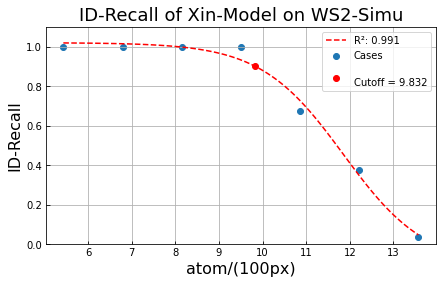

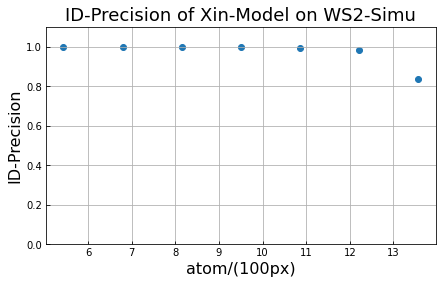

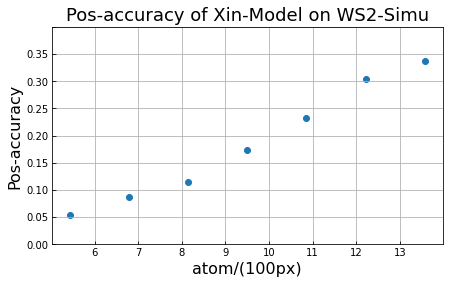

None None None


In [ ]:
xytitlenames = ['atom/(100px)','ID-Recall','ID-Recall of Xin-Model on WS2-Simu']
paramlist = [5.42888165,6.786102063,8.143322476,9.500542888,10.8577633,12.21498371,13.57220413]
scorelistR = [1,1,1,0.9976,0.6744,0.3748,0.0391]
scorelistP = [1,1,1,1,0.9921,0.9813,0.8372]
scorelistMSE = [0.05324,0.08695,0.115155,0.17346,0.23184,0.30411,0.33657]

cutoffR = visualscore_nonlinear(sigmoid, paramlist,scorelistR,xytitlenames,0.9,(0,1.1))
xytitlenames = ['atom/(100px)','ID-Precision','ID-Precision of Xin-Model on WS2-Simu']
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))

xytitlenames = ['atom/(100px)','Pos-accuracy','Pos-accuracy of Xin-Model on WS2-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))

print(cutoffR,cutoffP,cutoffMSE)

coefs: [-1.40164576 17.68351887  0.62625525  1.02031161]


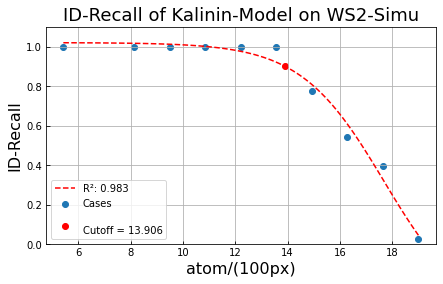

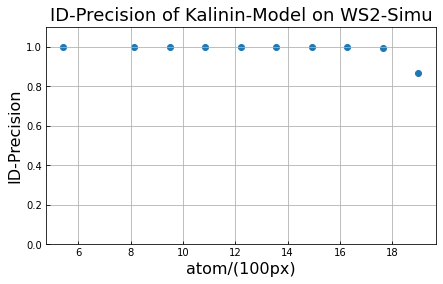

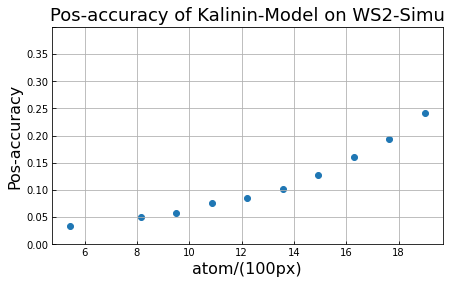

None None None


In [ ]:
xytitlenames = ['atom/(100px)','ID-Recall','ID-Recall of Kalinin-Model on WS2-Simu']
paramlist = [5.42888165,8.143322476,9.500542888,10.8577633,12.21498371,13.57220413,14.92942454,16.28664495,17.64386536,19.00108578]
scorelistR = [1,1,1,1,1,1,0.7755,0.5426,0.3936,0.0251]
scorelistP = [1,1,1,1,1,1,1,1,0.9917,0.8654]
scorelistMSE = [0.03439,0.049605,0.0573125,0.07514,0.0844875,0.101075,0.1270775,0.15987,0.1934075,0.24157]

cutoffR = visualscore_nonlinear(sigmoid, paramlist,scorelistR,xytitlenames,0.9,(0,1.1))
xytitlenames = ['atom/(100px)','ID-Precision','ID-Precision of Kalinin-Model on WS2-Simu']
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))

xytitlenames = ['atom/(100px)','Pos-accuracy','Pos-accuracy of Kalinin-Model on WS2-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))

print(cutoffR,cutoffP,cutoffMSE)

coefs: [-1.13050558 11.85215563  1.0550289   1.01993145]


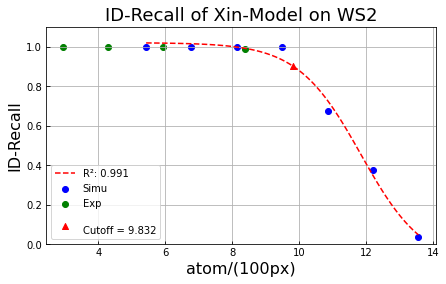

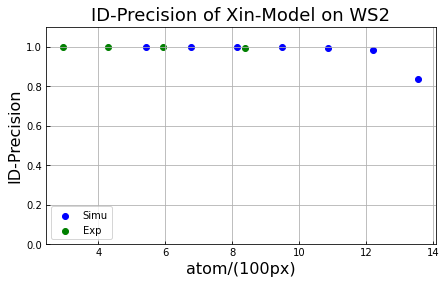

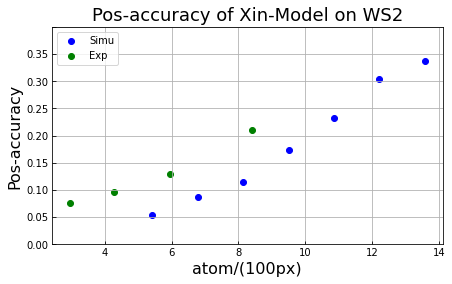

None None None


In [ ]:
xytitlenames = ['atom/(100px)','ID-Recall','ID-Recall of Xin-Model on WS2']
paramlist = [5.42888165,6.786102063,8.143322476,9.500542888,10.8577633,12.21498371,13.57220413]
scorelistR = [1,1,1,0.9976,0.6744,0.3748,0.0391]
scorelistP = [1,1,1,1,0.9921,0.9813,0.8372]
scorelistMSE = [0.05324,0.08695,0.115155,0.17346,0.23184,0.30411,0.33657]

eparamlist = [2.953311618,4.283387622,5.944625407,8.393051031]
escorelistR = [1,1,1,0.986]
escorelistP = [1,1,1,0.9929]
escorelistMSE = [0.07532224,0.09638424,0.1291005,0.21042606]

cutoffR = visualscore_nonlinear_compare(sigmoid,paramlist,scorelistR,xytitlenames,0.9,eparamlist,escorelistR,(0,1.1))
xytitlenames = ['atom/(100px)','ID-Precision','ID-Precision of Xin-Model on WS2']
cutoffP = visualscore_compare(paramlist,scorelistP,xytitlenames,0,1,0.95,eparamlist,escorelistP,(0,1.1))

xytitlenames = ['atom/(100px)','Pos-accuracy','Pos-accuracy of Xin-Model on WS2']
cutoffMSE = visualscore_compare(paramlist,scorelistMSE,xytitlenames,0,1,0.3,eparamlist,escorelistMSE,(0,0.4))

print(cutoffR,cutoffP,cutoffMSE)

coefs: [-1.40164576 17.68351887  0.62625525  1.02031161]


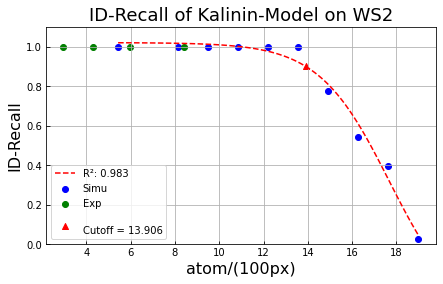

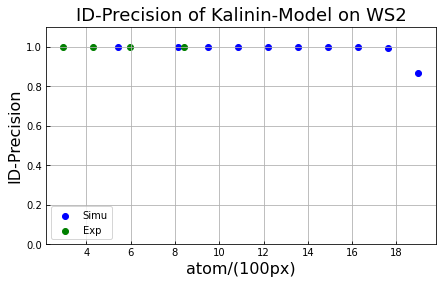

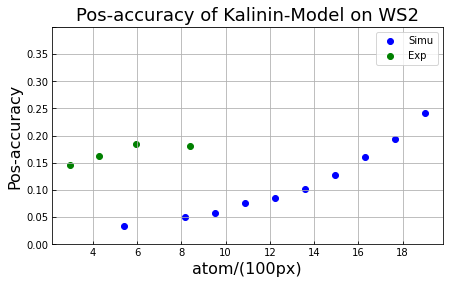

None None None


In [ ]:
xytitlenames = ['atom/(100px)','ID-Recall','ID-Recall of Kalinin-Model on WS2']
paramlist = [5.42888165,8.143322476,9.500542888,10.8577633,12.21498371,13.57220413,14.92942454,16.28664495,17.64386536,19.00108578]
scorelistR = [1,1,1,1,1,1,0.7755,0.5426,0.3936,0.0251]
scorelistP = [1,1,1,1,1,1,1,1,0.9917,0.8654]
scorelistMSE = [0.03439,0.049605,0.0573125,0.07514,0.0844875,0.101075,0.1270775,0.15987,0.1934075,0.24157]

eparamlist = [2.953311618,4.283387622,5.944625407,8.393051031]
escorelistR = [1,1,1,1]
escorelistP = [1,1,1,1]
escorelistMSE = [0.14679296,0.16321254,0.18394905,0.18037182]

cutoffR = visualscore_nonlinear_compare(sigmoid,paramlist,scorelistR,xytitlenames,0.9,eparamlist,escorelistR,(0,1.1))
xytitlenames = ['atom/(100px)','ID-Precision','ID-Precision of Kalinin-Model on WS2']
cutoffP = visualscore_compare(paramlist,scorelistP,xytitlenames,0,1,0.95,eparamlist,escorelistP,(0,1.1))

xytitlenames = ['atom/(100px)','Pos-accuracy','Pos-accuracy of Kalinin-Model on WS2']
cutoffMSE = visualscore_compare(paramlist,scorelistMSE,xytitlenames,0,1,0.3,eparamlist,escorelistMSE,(0,0.4))

print(cutoffR,cutoffP,cutoffMSE)

#### Contrast

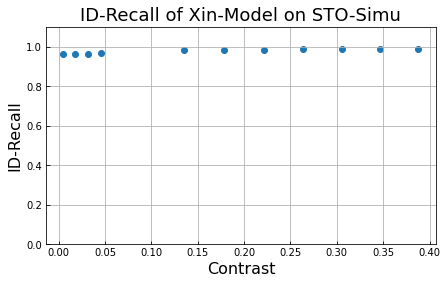

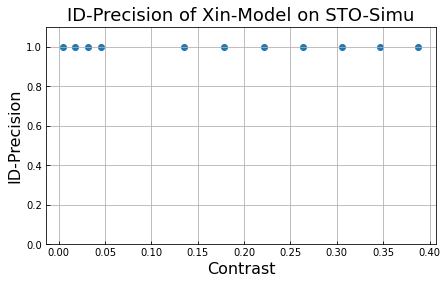

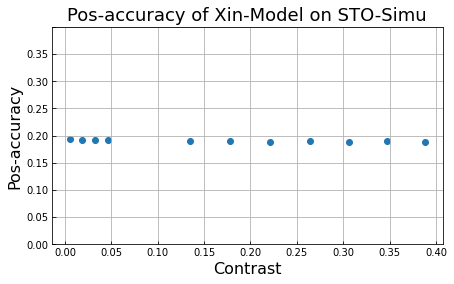

None None None


In [ ]:
xytitlenames = ['Contrast','ID-Recall','ID-Recall of Xin-Model on STO-Simu']
paramlist = [0.005,0.018,0.032,0.046,0.135,0.178,0.221,0.264,0.306,0.347,0.388]
scorelistR = [0.9643,0.9643,0.9643,0.9694,0.9821,0.9821,0.9821,0.9872,0.9872,0.9872,0.9898]
scorelistP = [0.9974,1,0.9974,0.9974,1,1,0.9974,1,1,1,1]
scorelistMSE = [0.1928734,0.19238672,0.19278876,0.19253484,0.19088436,0.1900168,0.18887416,0.19063044,0.18904344,0.18914924,0.18766804]
cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9,(0,1.1))

xytitlenames = ['Contrast','ID-Precision','ID-Precision of Xin-Model on STO-Simu']
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))

xytitlenames = ['Contrast','Pos-accuracy','Pos-accuracy of Xin-Model on STO-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))

print(cutoffR,cutoffP,cutoffMSE)

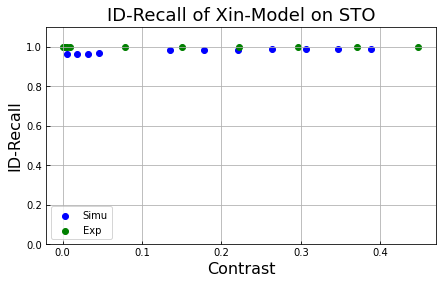

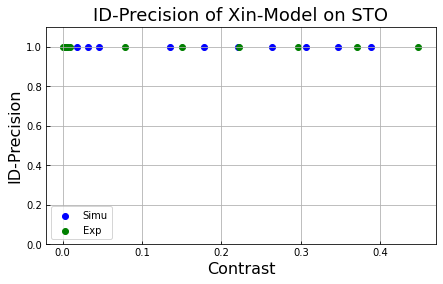

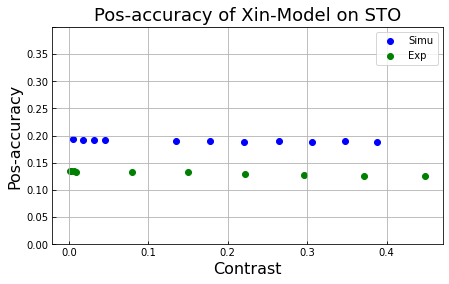

None None None


In [ ]:
xytitlenames = ['Contrast','ID-Recall','ID-Recall of Xin-Model on STO']
paramlist = [0.005,0.018,0.032,0.046,0.135,0.178,0.221,0.264,0.306,0.347,0.388]
scorelistR = [0.9643,0.9643,0.9643,0.9694,0.9821,0.9821,0.9821,0.9872,0.9872,0.9872,0.9898]
scorelistP = [0.9974,1,0.9974,0.9974,1,1,0.9974,1,1,1,1]
scorelistMSE = [0.1928734,0.19238672,0.19278876,0.19253484,0.19088436,0.1900168,0.18887416,0.19063044,0.18904344,0.18914924,0.18766804]

eparamlist = [0.001,0.003,0.006,0.009,0.079,0.15,0.222,0.296,0.371,0.448]
escorelistR = [1,1,1,1,1,1,1,1,1,1]
escorelistP = [1,1,1,1,1,1,1,1,1,1]
escorelistMSE = [0.1351557,0.13499001,0.13499001,0.1328676,0.13214172,0.13275714,0.13017711,0.12740772,0.12545889,0.12490659]

#cutoffR = visualscore_nonlinear_compare(sigmoid, paramlist,scorelistR,xytitlenames,0.9,eparamlist,escorelistR)
cutofFR = visualscore_compare(paramlist,scorelistR,xytitlenames,0,1,0.9,eparamlist,escorelistR,(0,1.1))
xytitlenames = ['Contrast','ID-Precision','ID-Precision of Xin-Model on STO']
cutoffP = visualscore_compare(paramlist,scorelistP,xytitlenames,0,1,0.95,eparamlist,escorelistP,(0,1.1))

xytitlenames = ['Contrast','Pos-accuracy','Pos-accuracy of Xin-Model on STO']
cutoffMSE = visualscore_compare(paramlist,scorelistMSE,xytitlenames,0,1,0.3,eparamlist,escorelistMSE,(0,0.4))

print(cutoffR,cutoffP,cutoffMSE)

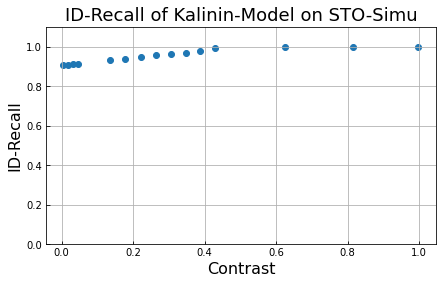

coefs: [ 0.06581519  0.33850268 11.24130929  0.93495453]


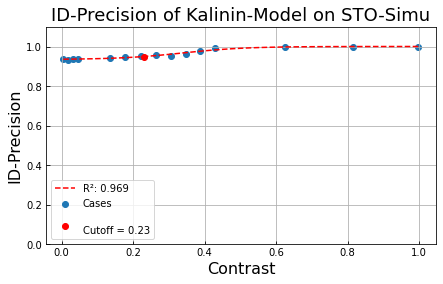

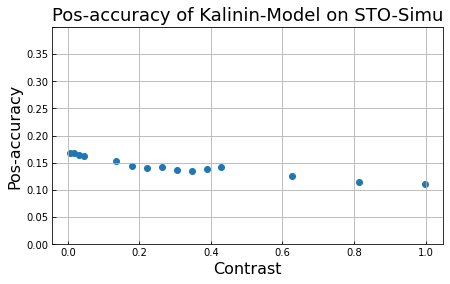

None None None


In [ ]:
xytitlenames = ['Contrast','ID-Recall','ID-Recall of Kalinin-Model on STO-Simu']
paramlist = [0.005,0.018,0.032,0.046,0.135,0.178,0.221,0.264,0.306,0.347,0.388,0.429,0.626,0.815,0.998]
scorelistR = [0.9083,0.9083,0.9142,0.9142,0.932,0.9349,0.9467,0.9556,0.9645,0.9675,0.9793,0.9911,1,1,1]
scorelistP = [0.936,0.9331,0.9364,0.9364,0.9431,0.9489,0.9524,0.9585,0.9532,0.9618,0.9793,0.9911,0.9971,1,1]
scorelistMSE = [0.1684336,0.16862404,0.16511148,0.16310128,0.15247896,0.14464976,0.14041776,0.1421952,0.13754,0.134366,0.138598,0.14287232,0.12552112,0.11392544,0.11125928]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,1,1,0.9)
cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9,(0,1.1))

xytitlenames = ['Contrast','ID-Precision','ID-Precision of Kalinin-Model on STO-Simu']
#cutoffP = visualscore(paramlist,np.square(scorelistP),xytitlenames,1,3,1)
cutoffP = visualscore_nonlinear(sigmoid,paramlist,scorelistP,xytitlenames,0.95,(0,1.1))

xytitlenames = ['Contrast','Pos-accuracy','Pos-accuracy of Kalinin-Model on STO-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscoresigmoid(paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)

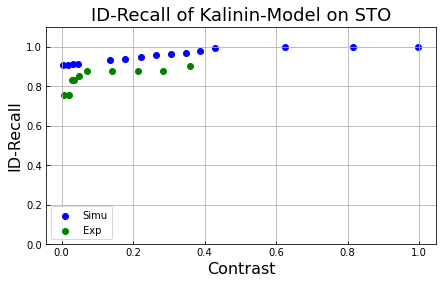

coefs: [ 0.06581519  0.33850268 11.24130929  0.93495453]


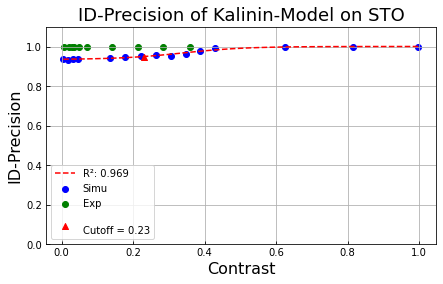

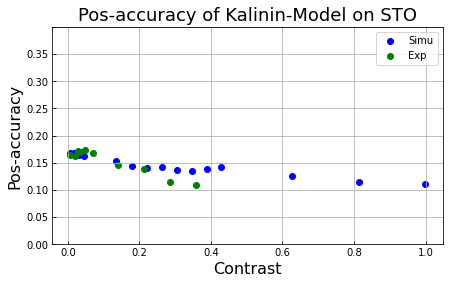

None None None


In [ ]:
xytitlenames = ['Contrast','ID-Recall','ID-Recall of Kalinin-Model on STO']
paramlist = [0.005,0.018,0.032,0.046,0.135,0.178,0.221,0.264,0.306,0.347,0.388,0.429,0.626,0.815,0.998]
scorelistR = [0.9083,0.9083,0.9142,0.9142,0.932,0.9349,0.9467,0.9556,0.9645,0.9675,0.9793,0.9911,1,1,1]
scorelistP = [0.936,0.9331,0.9364,0.9364,0.9431,0.9489,0.9524,0.9585,0.9532,0.9618,0.9793,0.9911,0.9971,1,1]
scorelistMSE = [0.1684336,0.16862404,0.16511148,0.16310128,0.15247896,0.14464976,0.14041776,0.1421952,0.13754,0.134366,0.138598,0.14287232,0.12552112,0.11392544,0.11125928]

eparamlist = [0.007,0.021,0.028,0.035,0.049,0.07,0.141,0.213,0.285,0.359]
escorelistR = [0.7561,0.7561,0.8293,0.8293,0.8537,0.878,0.878,0.878,0.878,0.9024]
escorelistP = [1,1,1,1,1,1,1,1,1,1]
escorelistMSE = [0.16464063,0.16304685,0.17147337,0.16981647,0.17257008,0.16802544,0.14644629,0.13914015,0.11438922,0.10878732]

#cutoffR = visualscore_nonlinear_compare(sigmoid, paramlist,scorelistR,xytitlenames,0.9,eparamlist,escorelistR)
cutoffR = visualscore_compare(paramlist,scorelistR,xytitlenames,0,1,0.9,eparamlist,escorelistR,(0,1.1))
xytitlenames = ['Contrast','ID-Precision','ID-Precision of Kalinin-Model on STO']
cutoffP = visualscore_nonlinear_compare(sigmoid, paramlist,scorelistP,xytitlenames,0.95,eparamlist,escorelistP,(0,1.1))

xytitlenames = ['Contrast','Pos-accuracy','Pos-accuracy of Kalinin-Model on STO']
cutoffMSE = visualscore_compare(paramlist,scorelistMSE,xytitlenames,0,1,0.3,eparamlist,escorelistMSE,(0,0.4))

print(cutoffR,cutoffP,cutoffMSE)

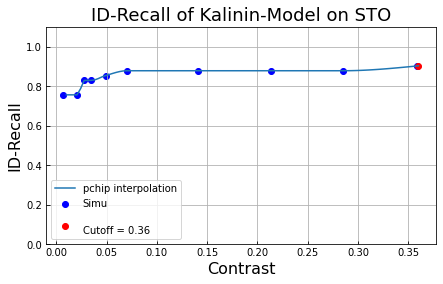

In [ ]:
xytitlenames = ['Contrast','ID-Recall','ID-Recall of Kalinin-Model on STO']
paramlist = [0.005,0.018,0.032,0.046,0.135,0.178,0.221,0.264,0.306,0.347,0.388,0.429,0.626,0.815,0.998]
scorelistR = [0.9083,0.9083,0.9142,0.9142,0.932,0.9349,0.9467,0.9556,0.9645,0.9675,0.9793,0.9911,1,1,1]

eparamlist = [0.007,0.021,0.028,0.035,0.049,0.07,0.141,0.213,0.285,0.359]
escorelistR = [0.7561,0.7561,0.8293,0.8293,0.8537,0.878,0.878,0.878,0.878,0.9024]

#cutoffR = visualscore_nonlinear_compare(sigmoid, paramlist,scorelistR,xytitlenames,0.9,eparamlist,escorelistR)
cutoffR = visualscore_pchip(eparamlist,escorelistR,xytitlenames,0.9,(0,1.1))

#### Resolution

coefs: [-9.63693412e-01  2.89135174e+02  7.59963149e-02  1.00289539e+00]


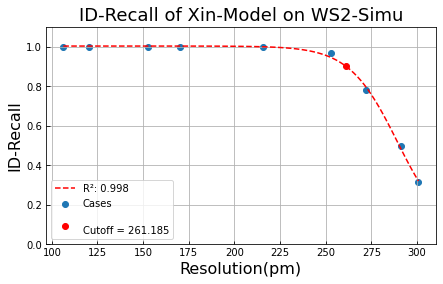

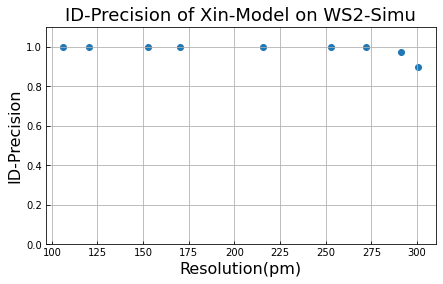

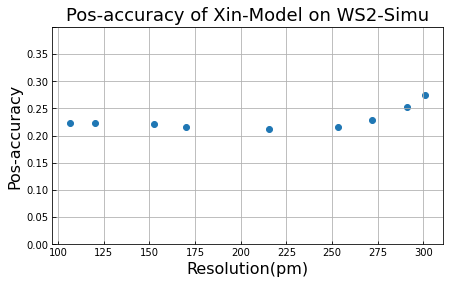

None None None


In [ ]:
xytitlenames = ['Resolution(pm)','ID-Recall','ID-Recall of Xin-Model on WS2-Simu']
paramlist = [106.3,120.4,152.6,170,215.4,253,272,291.2,300.8]
scorelistR = [1,1,1,1,1,0.9678,0.7781,0.4952,0.3151]
scorelistP = [1,1,1,1,1,1,1,0.9747,0.8991]
scorelistMSE = [0.22356,0.222345,0.220605,0.21609,0.211905,0.215385,0.229395,0.25293,0.274635]
#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9)
cutoffR = visualscore_nonlinear(sigmoid,paramlist,scorelistR,xytitlenames,0.9,(0,1.1))

xytitlenames = ['Resolution(pm)','ID-Precision','ID-Precision of Xin-Model on WS2-Simu']
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))
#cutoffP = visualscore_nonlinear(poly3,paramlist,scorelistP,xytitlenames,0.95)

xytitlenames = ['Resolution(pm)','Pos-accuracy','Pos-accuracy of Xin-Model on WS2-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)

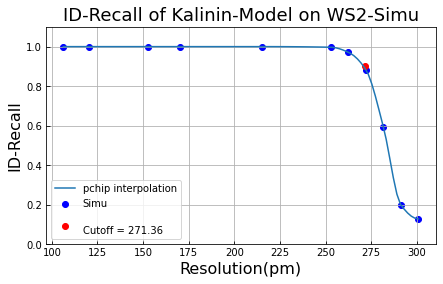

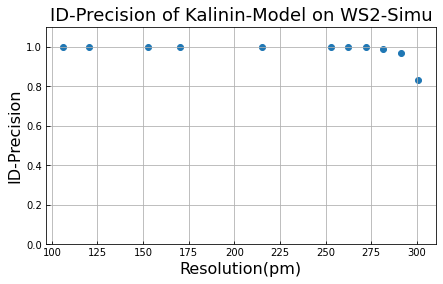

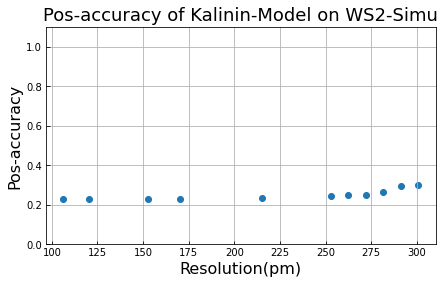

None None None


In [ ]:
xytitlenames = ['Resolution(pm)','ID-Recall','ID-Recall of Kalinin-Model on WS2-Simu']
paramlist = [106.3,120.4,152.6,170,215.4,253,262.5,272,281.6,291.2,300.83]
scorelistR = [1,1,1,1,1,0.9968,0.9711,0.8842,0.5949,0.1994,0.1286]
scorelistP = [1,1,1,1,1,1,1,0.9964,0.9893,0.9688,0.8333]
scorelistMSE = [0.22761,0.22857,0.227775,0.22689,0.23547,0.243255,0.24885,0.25092,0.266985,0.292875,0.29904]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9)
#cutoffR1 = visualscore_nonlinear(sigmoid,paramlist,scorelistR,xytitlenames,0.9,(0,1.1))
cutoffR = visualscore_pchip(paramlist,scorelistR,xytitlenames,0.9,(0,1.1))
xytitlenames = ['Resolution(pm)','ID-Precision','ID-Precision of Kalinin-Model on WS2-Simu']
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))
#cutoffP = visualscore_nonlinear(poly3,paramlist,scorelistP,xytitlenames,0.95)

xytitlenames = ['Resolution(pm)','Pos-accuracy','Pos-accuracy of Kalinin-Model on WS2-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,1.1))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)




coefs: [-9.63693412e-01  2.89135174e+02  7.59963149e-02  1.00289539e+00]


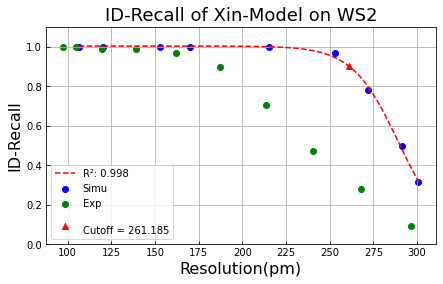

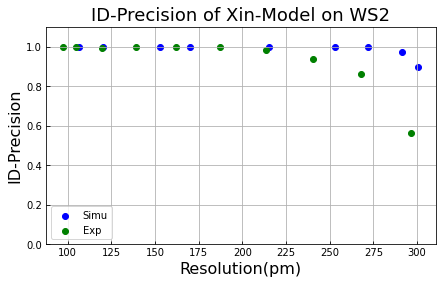

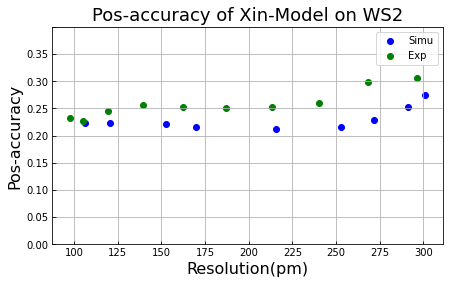

None None None


In [ ]:
xytitlenames = ['Resolution(pm)','ID-Recall','ID-Recall of Xin-Model on WS2']
paramlist = [106.3,120.4,152.6,170,215.4,253,272,291.2,300.8]
scorelistR = [1,1,1,1,1,0.9678,0.7781,0.4952,0.3151]
scorelistP = [1,1,1,1,1,1,1,0.9747,0.8991]
scorelistMSE = [0.22356,0.222345,0.220605,0.21609,0.211905,0.215385,0.229395,0.25293,0.274635]

eparamlist = [97.5,104.9,119.6,139.3,162.2,187.1,213.3,240.4,268.2,296.3]
escorelistR = [1,1,0.986,0.986,0.9684,0.8947,0.7053,0.4702,0.2807,0.0947]
escorelistP = [1,0.9965,0.9929,0.9965,0.9964,0.9961,0.9853,0.9371,0.8602,0.5625]
escorelistMSE = [0.2323638,0.22686004,0.24575216,0.2556311,0.25272462,0.25071482,0.2523072,0.25932604,0.29867174,0.30663364]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9)
cutoffR = visualscore_nonlinear_compare(sigmoid,paramlist,scorelistR,xytitlenames,0.9,eparamlist,escorelistR,(0,1.1))

xytitlenames = ['Resolution(pm)','ID-Precision','ID-Precision of Xin-Model on WS2']
cutoffP = visualscore_compare(paramlist,scorelistP,xytitlenames,0,1,0.95,eparamlist,escorelistP,(0,1.1))
#cutoffP = visualscore_nonlinear(poly3,paramlist,scorelistP,xytitlenames,0.95)

xytitlenames = ['Resolution(pm)','Pos-accuracy','Pos-accuracy of Xin-Model on WS2']
cutoffMSE = visualscore_compare(paramlist,scorelistMSE,xytitlenames,0,1,0.3,eparamlist,escorelistMSE,(0,0.4))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)

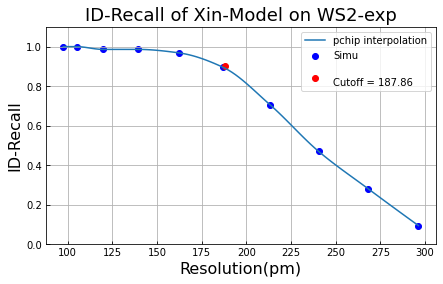

In [ ]:
xytitlenames = ['Resolution(pm)','ID-Recall','ID-Recall of Xin-Model on WS2-exp']
eparamlist = [97.5,104.9,119.6,139.3,162.2,187.1,213.3,240.4,268.2,296.3]
escorelistR = [1,1,0.986,0.986,0.9684,0.8947,0.7053,0.4702,0.2807,0.0947]
cutoffR = visualscore_pchip(eparamlist,escorelistR,xytitlenames,0.9,(0,1.1))


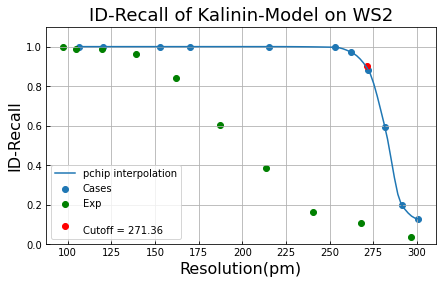

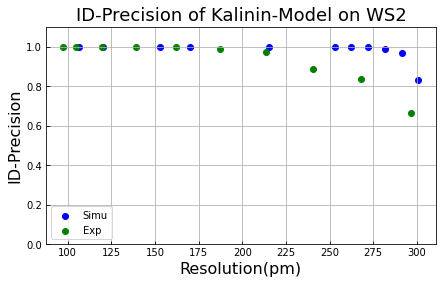

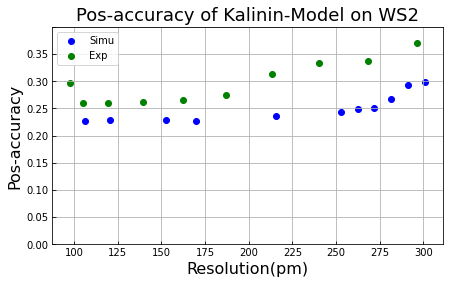

None None None


In [ ]:
xytitlenames = ['Resolution(pm)','ID-Recall','ID-Recall of Kalinin-Model on WS2']
paramlist = [106.3,120.4,152.6,170,215.4,253,262.5,272,281.6,291.2,300.83]
scorelistR = [1,1,1,1,1,0.9968,0.9711,0.8842,0.5949,0.1994,0.1286]
scorelistP = [1,1,1,1,1,1,1,0.9964,0.9893,0.9688,0.8333]
scorelistMSE = [0.22761,0.22857,0.227775,0.22689,0.23547,0.243255,0.24885,0.25092,0.266985,0.292875,0.29904]

eparamlist = [97.5,104.9,119.6,139.3,162.2,187.1,213.3,240.4,268.2,296.3]
escorelistR = [1,0.9895,0.9895,0.9649,0.8421,0.6035,0.386,0.1649,0.1088,0.0351]
escorelistP = [1,1,1,1,1,0.9885,0.9735,0.8868,0.8378,0.6667]
escorelistMSE = [0.29670832,0.26047008,0.25929512,0.26254172,0.26458244,0.27543536,0.31253936,0.33367318,0.33804836,0.36940124]


cutoffR = visualscore_pchip_compare(paramlist,scorelistR,xytitlenames,0.9,eparamlist, escorelistR,(0,1.1))
xytitlenames = ['Resolution(pm)','ID-Precision','ID-Precision of Kalinin-Model on WS2']
cutoffP = visualscore_compare(paramlist,scorelistP,xytitlenames,0,1,0.95,eparamlist, escorelistP,(0,1.1))


xytitlenames = ['Resolution(pm)','Pos-accuracy','Pos-accuracy of Kalinin-Model on WS2']
cutoffMSE = visualscore_compare(paramlist,scorelistMSE,xytitlenames,0,1,0.3, eparamlist, escorelistMSE,(0,0.4))

print(cutoffR,cutoffP,cutoffMSE)

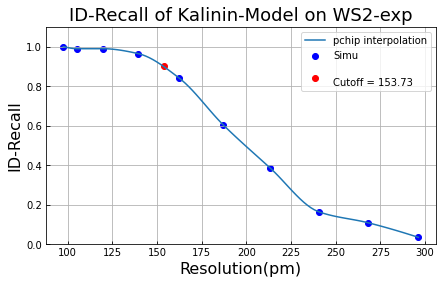

In [ ]:
xytitlenames = ['Resolution(pm)','ID-Recall','ID-Recall of Kalinin-Model on WS2-exp']

eparamlist = [97.5,104.9,119.6,139.3,162.2,187.1,213.3,240.4,268.2,296.3]
escorelistR = [1,0.9895,0.9895,0.9649,0.8421,0.6035,0.386,0.1649,0.1088,0.0351]
cutoffR = visualscore_pchip(eparamlist,escorelistR,xytitlenames,0.9,(0,1.1))


#### Poisson noise

coefs: [9.92667971e-01 1.43688829e+01 1.13582401e+00 8.52976722e-03]


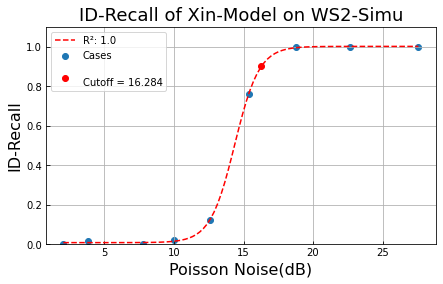

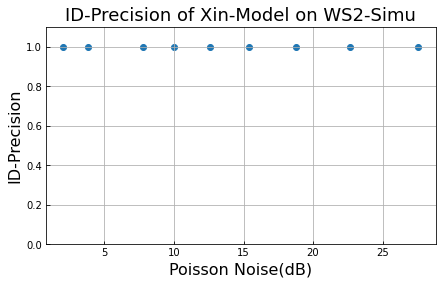

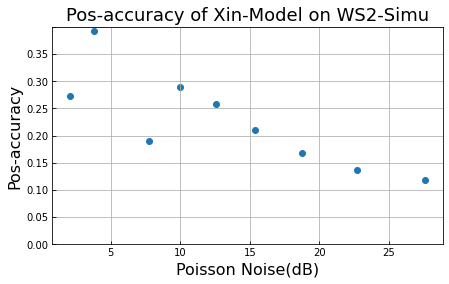

None None None


In [ ]:
xytitlenames = ['Poisson Noise(dB)','ID-Recall','ID-Recall of Xin-Model on WS2-Simu']
paramlist = [2.04,3.82,7.76,10,12.57,15.38,18.75,22.69,27.58]
scorelistR = [0.0032,0.0161,0.0032,0.0193,0.1222,0.7621,0.9968,1,1]
scorelistP = [1,1,1,1,1,1,1,1,1]
scorelistMSE = [0.272655,0.39174,0.18972,0.28944,0.258045,0.210765,0.16722,0.137355,0.11808]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,1,1,0.9)
cutoffR = visualscore_nonlinear(sigmoid,paramlist,scorelistR,xytitlenames,0.9,(0,1.1))


xytitlenames = ['Poisson Noise(dB)','ID-Precision','ID-Precision of Xin-Model on WS2-Simu']
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,1,(0,1.1))
#cutoffP = visualscore_nonlinear(poly3,paramlist,scorelistP,xytitlenames,0.95)

xytitlenames = ['Poisson Noise(dB)','Pos-accuracy','Pos-accuracy of Xin-Model on WS2-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscoresigmoid(paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)

coefs: [ 1.02414907  4.41213106  1.54289923 -0.0258845 ]


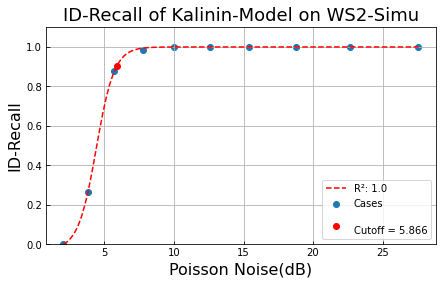

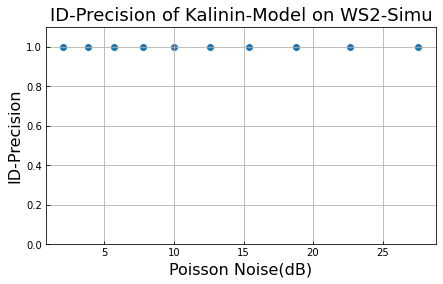

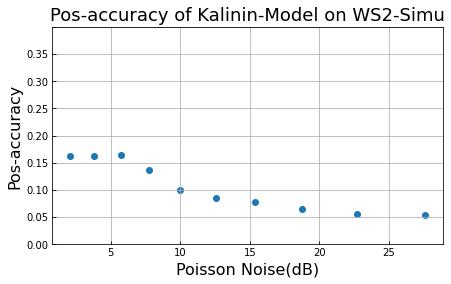

None None None


In [ ]:
xytitlenames = ['Poisson Noise(dB)','ID-Recall','ID-Recall of Kalinin-Model on WS2-Simu']
paramlist = [2.04, 3.82,5.71,7.76,10,12.57,15.38,18.75,22.69,27.58]
scorelistR = [0, 0.2669,0.8778,0.9807,1,1,1,1,1,1]
scorelistP = [1, 1,1,1,1,1,1,1,1,1]
scorelistMSE = [0.162555, 0.162555,0.163665,0.135975,0.10059,0.085695,0.07728,0.065535,0.056415,0.053685]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,1,1,0.9)
cutoffR = visualscore_nonlinear(sigmoid,paramlist,scorelistR,xytitlenames,0.9,(0,1.1))


xytitlenames = ['Poisson Noise(dB)','ID-Precision','ID-Precision of Kalinin-Model on WS2-Simu']
#cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,1)
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))

xytitlenames = ['Poisson Noise(dB)','Pos-accuracy','Pos-accuracy of Kalinin-Model on WS2-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)

#### Fly back error

coefs: [-0.84224547  2.38286929  4.16856329  0.99703839]


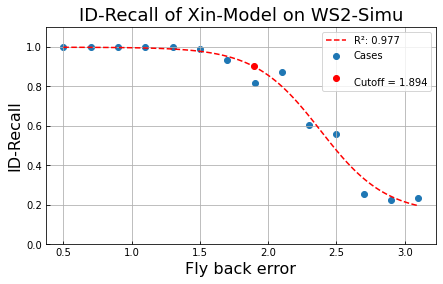

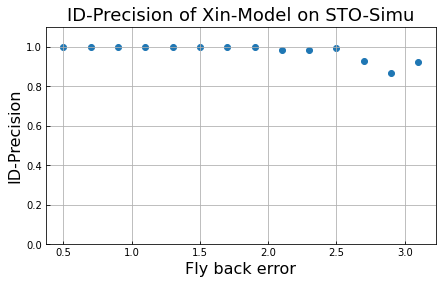

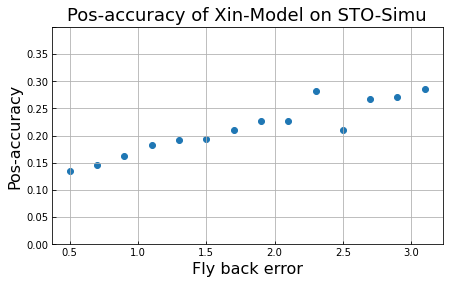

None None None


In [ ]:
xytitlenames = ['Fly back error','ID-Recall','ID-Recall of Xin-Model on WS2-Simu']
paramlist = [0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9,3.1]
scorelistR = [1,1,1,1,1,0.9904,0.9325,0.8167,0.8714,0.6045,0.5563,0.254,0.2251,0.2347]
scorelistP = [1,1,1,1,1,1,1,0.9961,0.9819,0.9843,0.9943,0.9294,0.8642,0.9241]
scorelistMSE = [0.134835,0.146505,0.16176,0.182355,0.192375,0.193095,0.21042,0.226155,0.227205,0.28182,0.21,0.26712,0.27075,0.28599]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9)
cutoffR = visualscore_nonlinear(sigmoid,paramlist,scorelistR,xytitlenames,0.9,(0,1.1))
#cutoffR = visualscore_pchip(paramlist,scorelistR,xytitlenames,0.9)
xytitlenames = ['Fly back error','ID-Precision','ID-Precision of Xin-Model on STO-Simu']
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))
#cutoffP = visualscore_nonlinear(poly3,paramlist,scorelistP,xytitlenames,0.95)

xytitlenames = ['Fly back error','Pos-accuracy','Pos-accuracy of Xin-Model on STO-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)


coefs: [ 256.31849645    4.56527497  -10.54076643 -255.32202742]


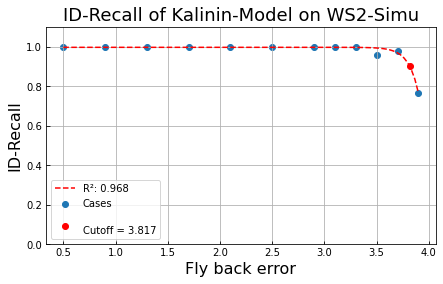

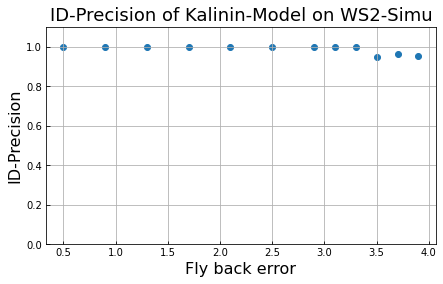

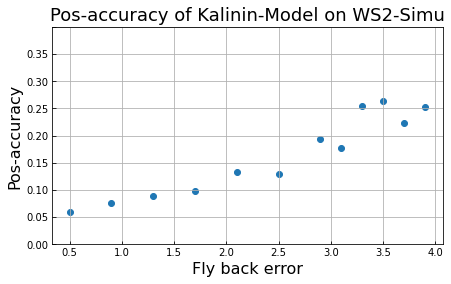

None None None


In [ ]:
xytitlenames = ['Fly back error','ID-Recall','ID-Recall of Kalinin-Model on WS2-Simu']
paramlist = [0.5,0.9,1.3,1.7,2.1,2.5,2.9,3.1,3.3,3.5,3.7,3.9]
scorelistR = [1,1,1,1,1,1,1,1,0.9968,0.9555,0.9775,0.7653]
scorelistP = [1,1,1,1,1,1,1,1,0.9968,0.9489,0.962,0.952]
scorelistMSE = [0.060285,0.07683,0.08826,0.09894,0.13242,0.13008,0.1929,0.177075,0.25443,0.262965,0.22326,0.252945]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9)
cutoffR = visualscore_nonlinear(sigmoid,paramlist,scorelistR,xytitlenames,0.9,(0,1.1))
#cutoffR = visualscore_pchip(paramlist,scorelistR,xytitlenames,0.9)
xytitlenames = ['Fly back error','ID-Precision','ID-Precision of Kalinin-Model on WS2-Simu']
#cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95)
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))

xytitlenames = ['Fly back error','Pos-accuracy','Pos-accuracy of Kalinin-Model on WS2-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)

#### Random drift

coefs: [  0.46007517   0.16867134 -39.57784217   0.54865934]


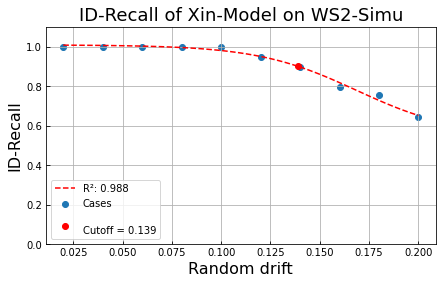

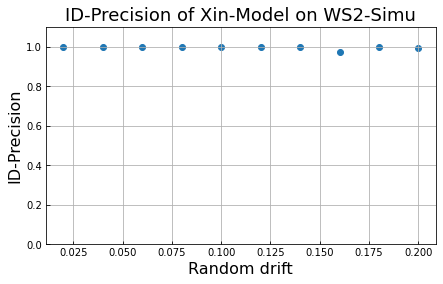

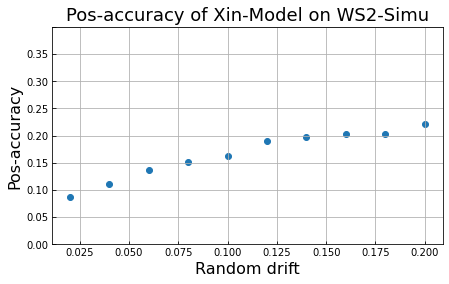

None None None


In [ ]:
xytitlenames = ['Random drift','ID-Recall','ID-Recall of Xin-Model on WS2-Simu']
paramlist = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
scorelistR = [1,1,1,1,1,0.949,0.8947,0.7963,0.7546,0.6417]
scorelistP = [1,1,1,1,1,1,1,0.9736,1,0.9952]
scorelistMSE = [0.086805,0.110715,0.13605,0.150975,0.16314,0.189915,0.19737,0.20316,0.203295,0.22203]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9)
cutoffR = visualscore_nonlinear(sigmoid,paramlist,scorelistR,xytitlenames,0.9,(0,1.1))
#cutoffR = visualscore_pchip(paramlist,scorelistR,xytitlenames,0.9)
xytitlenames = ['Random drift','ID-Precision','ID-Precision of Xin-Model on WS2-Simu']
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))
#cutoffP = visualscore_nonlinear(poly3,paramlist,scorelistP,xytitlenames,0.95)

xytitlenames = ['Random drift','Pos-accuracy','Pos-accuracy of Xin-Model on WS2-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)

coefs: [ 6.83162990e+02  4.67576935e-01 -4.83088466e+01 -6.82167266e+02]


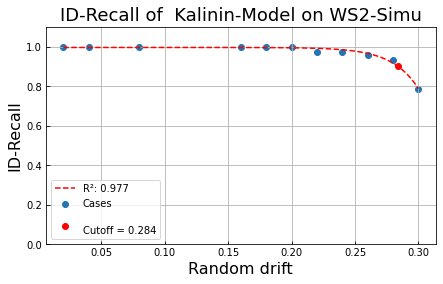

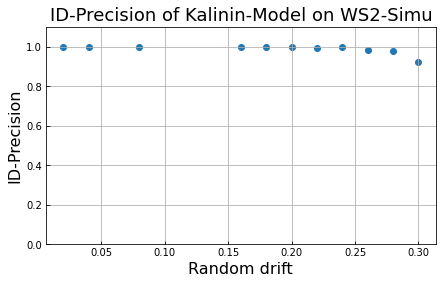

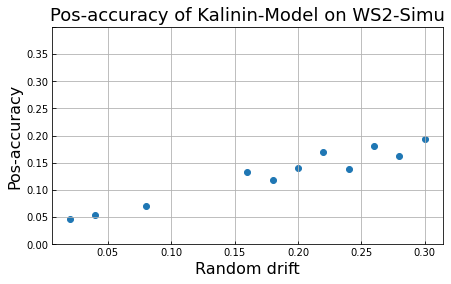

None None None


In [ ]:
xytitlenames = ['Random drift','ID-Recall','ID-Recall of  Kalinin-Model on WS2-Simu']
paramlist = [0.02,0.04,0.08,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3]
scorelistR = [1,1,1,1,1,1,0.972,0.9726,0.9568,0.9315,0.784]
scorelistP = [1,1,1,1,1,0.9969,0.9937,1,0.9841,0.9781,0.9203]
scorelistMSE = [0.04737,0.0531,0.07122,0.13386,0.117525,0.14106,0.17049,0.13896,0.18087,0.162675,0.19443]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9)
cutoffR = visualscore_nonlinear(sigmoid,paramlist,scorelistR,xytitlenames,0.9,(0,1.1))
#cutoffR = visualscore_pchip(paramlist,scorelistR,xytitlenames,0.9)

xytitlenames = ['Random drift','ID-Precision','ID-Precision of Kalinin-Model on WS2-Simu']
#cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95)
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))

xytitlenames = ['Random drift','Pos-accuracy','Pos-accuracy of Kalinin-Model on WS2-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)

#### Dwell time

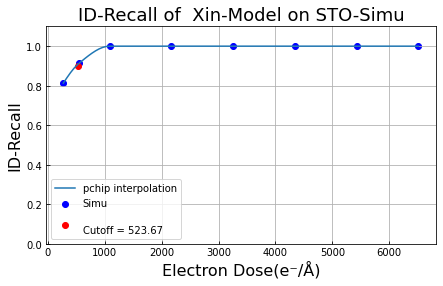

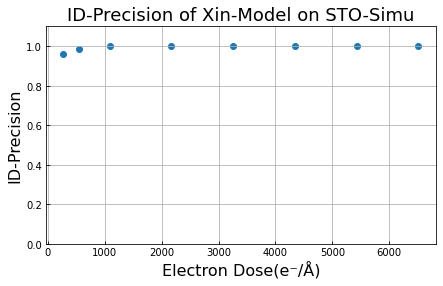

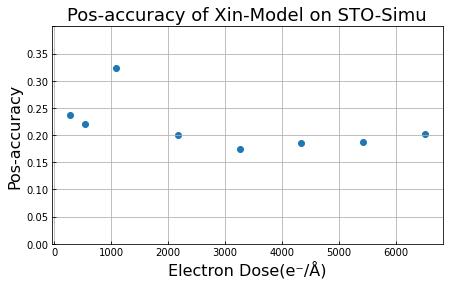

None None None


In [ ]:
xytitlenames = ['Electron Dose(e\u207B/\u212B)','ID-Recall','ID-Recall of  Xin-Model on STO-Simu']
paramlist = [271.4269301,542.8538603,1085.707721,2171.415441,3257.123162,4342.830882,5428.538603,6514.246324]
scorelistR = [0.8132,0.9123,1,1,1,1,1,1]
scorelistP = [0.961,0.9881,1,1,1,1,1,1]
scorelistMSE = [0.237184,0.219776,0.324224,0.200192,0.17408,0.18496,0.187136,0.202368]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9)
cutoffR = visualscore_pchip(paramlist,scorelistR,xytitlenames,0.9,(0,1.1))
#cutoffR = visualscore_pchip(paramlist,scorelistR,xytitlenames,0.9)

xytitlenames = ['Electron Dose(e\u207B/\u212B)','ID-Precision','ID-Precision of Xin-Model on STO-Simu']
#cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95)
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))

xytitlenames = ['Electron Dose(e\u207B/\u212B)','Pos-accuracy','Pos-accuracy of Xin-Model on STO-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)

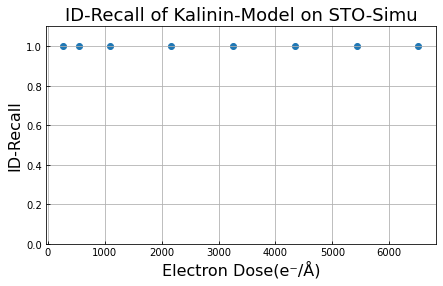

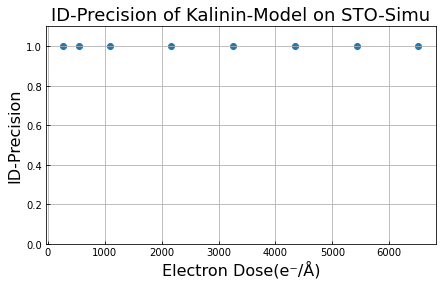

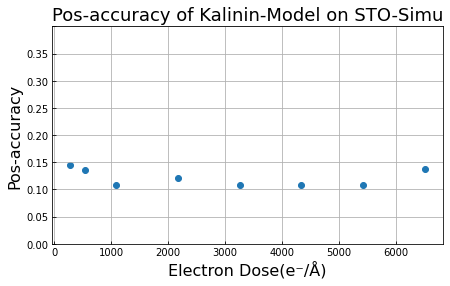

None None None


In [ ]:
xytitlenames = ['Electron Dose(e\u207B/\u212B)','ID-Recall','ID-Recall of Kalinin-Model on STO-Simu']
paramlist = [271.4269301,542.8538603,1085.707721,2171.415441,3257.123162,4342.830882,5428.538603,6514.246324]
scorelistR = [1,1,1,1,1,1,1,1]
scorelistP = [1,1,1,1,1,1,1,1]
scorelistMSE = [0.145792,0.134912,0.1088,0.121856,0.1088,0.1088,0.1083648,0.137088]

#cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9)
cutoffR = visualscore(paramlist,scorelistR,xytitlenames,0,1,0.9,(0,1.1))
#cutoffR = visualscore_pchip(paramlist,scorelistR,xytitlenames,0.9)

xytitlenames = ['Electron Dose(e\u207B/\u212B)','ID-Precision','ID-Precision of Kalinin-Model on STO-Simu']
#cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95)
cutoffP = visualscore(paramlist,scorelistP,xytitlenames,0,1,0.95,(0,1.1))

xytitlenames = ['Electron Dose(e\u207B/\u212B)','Pos-accuracy','Pos-accuracy of Kalinin-Model on STO-Simu']
cutoffMSE = visualscore(paramlist,scorelistMSE,xytitlenames,0,1,0.3,(0,0.4))
#cutoffMSE = visualscore_nonlinear(sigmoid,paramlist,scorelistMSE,xytitlenames,0.3)
print(cutoffR,cutoffP,cutoffMSE)